<a href="https://colab.research.google.com/github/olyavydrina/-/blob/main/%22%D0%92%D0%9A%D0%A0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключаем необходимы библиотеки (модули из TensorFlow)

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина новости
max_news_len = 500
# Количество классов новостей
nb_classes = 2

## Загрузка набора данных

Загружаем данные для обучения

In [ ]:
train = pd.read_excel('/content/train1.xlsx')
train.head()

,class,title,text,link,language
0,1,Freed Russian arms dealer Viktor Bout says he ...,Freed Russian arms dealer Viktor Bout said on ...,https://edition.cnn.com/2022/12/10/europe/vikt...,eng
1,1,Taiwan reports record incursion by Chinese bom...,China has sent a record 18 nuclear-capable H-6...,https://edition.cnn.com/2022/12/13/asia/taiwan...,eng
2,1,Soccer union ‘sickened’ by reports Iranian pla...,"The global soccer players’ union, FIFPRO, said...",https://edition.cnn.com/2022/12/13/middleeast/...,eng
3,1,At least seven dead as Peru protests disrupt f...,At least seven people have died in ongoing pro...,https://edition.cnn.com/2022/12/13/americas/pe...,eng
4,1,Indian and Chinese troops clash on disputed bo...,Indian and Chinese troops have clashed on thei...,https://edition.cnn.com/2022/12/13/asia/india-...,eng


## Просматриваем данные

In [ ]:
!ls

best_model_lstm.h5  sample_data  test1.xlsx  train1.xlsx


In [ ]:
!wc -l train1.xlsx
!wc -l test1.xlsx

1906 train1.xlsx
423 test1.xlsx


## Загружаем данные в память

Выделяем данные для обучения

In [ ]:
news = train['text']

In [ ]:
news[:5]

0    Freed Russian arms dealer Viktor Bout said on ...
1    China has sent a record 18 nuclear-capable H-6...
2    The global soccer players’ union, FIFPRO, said...
3    At least seven people have died in ongoing pro...
4    Indian and Chinese troops have clashed on thei...
Name: text, dtype: object

Выделяем правильные ответы (преобразуем в формат one hot encoding)

In [ ]:
y_train = utils.to_categorical(train['class'], nb_classes)

In [ ]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## Токенизация текста

Создаем токенизатор Keras

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на новостях

In [ ]:
tokenizer.fit_on_texts(news)

Просматриваем словарь токенизатора

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'for': 8,
 'on': 9,
 'de': 10,
 'is': 11,
 'said': 12,
 'with': 13,
 'as': 14,
 '”': 15,
 'was': 16,
 'it': 17,
 'from': 18,
 'la': 19,
 'by': 20,
 'at': 21,
 'have': 22,
 'has': 23,
 'be': 24,
 'are': 25,
 'à': 26,
 'he': 27,
 'but': 28,
 'an': 29,
 'en': 30,
 'his': 31,
 'not': 32,
 'les': 33,
 'they': 34,
 'this': 35,
 'who': 36,
 'will': 37,
 'or': 38,
 'she': 39,
 'et': 40,
 'their': 41,
 'le': 42,
 'des': 43,
 'were': 44,
 'been': 45,
 'her': 46,
 'had': 47,
 'we': 48,
 'more': 49,
 'its': 50,
 'you': 51,
 'which': 52,
 '—': 53,
 'after': 54,
 'i': 55,
 'about': 56,
 'people': 57,
 'one': 58,
 'year': 59,
 'also': 60,
 'un': 61,
 'would': 62,
 'pour': 63,
 'than': 64,
 'du': 65,
 'new': 66,
 'when': 67,
 'over': 68,
 'into': 69,
 'two': 70,
 'up': 71,
 'mr': 72,
 'can': 73,
 'ukraine': 74,
 'all': 75,
 'article': 76,
 'what': 77,
 'there': 78,
 'years': 79,
 'our': 80,
 'out': 81,
 'so': 82,
 'if': 83,
 '–'

Преобразуем новости в числовое представление

In [ ]:
sequences = tokenizer.texts_to_sequences(news)

Просматриваем новости в числовом представлении

In [ ]:
index = 1
print(news[index])
print(sequences[index])

China has sent a record 18 nuclear-capable H-6 bomber aircraft into Taiwan’s air defense zone, the island’s Defense Ministry said Tuesday, as Beijing continues to step-up pressure on the self-ruled island.

The 18 bombers were part of 21 total Chinese warplanes sent into Taiwan’s southwest air defense identification zone – a buffer of airspace commonly referred to as an ADIZ – in the 24-hour span between Monday morning and Tuesday morning, according to Taiwan’s Defense Ministry.

The ministry said it monitored the situation and employed its fighter jets as well as land-based missile systems to track the Chinese planes.

The flights represent the largest number of H-6 sorties in a 24-hour period since Taipei began releasing daily data on Chinese fighter incursions in 2020.

An ADIZ is unilaterally imposed and distinct from sovereign airspace, which is defined under international law as extending 12 nautical miles from a territory’s shoreline.

China’s ruling Chinese Communist Party view

In [ ]:
tokenizer.word_index['nuclear']

759

Ограничиваем длину новостных сообщений

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [ ]:
x_train[:5]

array([[   0,    0,    0, ...,  895,   83, 1651],
       [   0,    0,    0, ...,  934,    2, 2129],
       [   0,    0,    0, ...,  118,  376,  661],
       [   0,    0,    0, ..., 4115,    1, 1038],
       [  15, 3479,   12, ...,  486,  100,   15]], dtype=int32)

## Создаем нейронную сеть с долгой краткосрочной памятью - LSTM

In [ ]:
model_lstm = Sequential()
# 1-й слой - Embedding - создает плотные векторные представления слов, длина вектора - 32
model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
# 2-й слой - LSTM - в нем 24 ячейки
model_lstm.add(LSTM(24))
# 3-й слой - Выходной полносвязный слой, 2 нейрона (по количеству классов)
model_lstm.add(Dense(2, activation='sigmoid'))

создаем последовательную модель (определяем оптимизатор, функцию ошибки)

In [ ]:
model_lstm.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

Выводим информацию о сети

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 24)                5472      
                                                                 
 dense_1 (Dense)             (None, 2)                 50        
                                                                 
Total params: 325,522
Trainable params: 325,522
Non-trainable params: 0
_________________________________________________________________


Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
model_lstm_save_path = '/content/best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

Обучаем нейронную сеть

In [ ]:
history_lstm = model_lstm.fit(x_train,
                              y_train, 
                              epochs=4,
                              batch_size=16,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/4
7/9 [======================>.......] - ETA: 0s - loss: 0.6933 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 0.47222, saving model to /content/best_model_lstm.h5
9/9 [==============================] - 2s 76ms/step - loss: 0.6932 - accuracy: 0.4931 - val_loss: 0.6925 - val_accuracy: 0.4722
Epoch 2/4
7/9 [======================>.......] - ETA: 0s - loss: 0.6882 - accuracy: 0.7857
Epoch 2: val_accuracy improved from 0.47222 to 0.52778, saving model to /content/best_model_lstm.h5
9/9 [==============================] - 0s 27ms/step - loss: 0.6881 - accuracy: 0.7778 - val_loss: 0.6933 - val_accuracy: 0.5278
Epoch 3/4
8/9 [=========================>....] - ETA: 0s - loss: 0.6804 - accuracy: 0.8047
Epoch 3: val_accuracy did not improve from 0.52778
9/9 [==============================] - 0s 22ms/step - loss: 0.6795 - accuracy: 0.8056 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 4/4
9/9 [==============================] - ETA: 0s - loss: 0.6559 - accuracy: 0.8819
Epoc

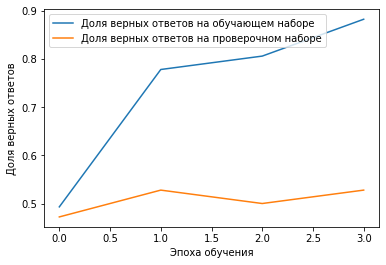

In [ ]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Загружаем набор данных для тестирования

In [ ]:
test = pd.read_excel('/content/test1.xlsx')

In [ ]:
test

,class,title,text,link,language
0,1,Moscow appeals for army recruits to fight in U...,Moscow has begun a new campaign to encourage R...,https://edition.cnn.com/2022/12/17/europe/mosc...,eng
1,1,Death toll rises to 23 after landslide near ca...,The number of people killed in a landslide Fri...,https://edition.cnn.com/2022/12/15/asia/malays...,eng
2,0,What to do about the highest interest rate in ...,"In its last policymaking meeting of the year, ...",https://edition.cnn.com/2022/12/14/success/wha...,eng
3,0,Virginia Beach reaches $3 million settlement o...,The city of Virginia Beach has reached a $3 mi...,https://edition.cnn.com/2022/12/15/us/donovon-...,eng
4,1,Angelina Jolie steps down as UN refugee agency...,Angelina Jolie is moving on from her role as a...,https://edition.cnn.com/2022/12/17/americas/an...,eng
5,1,Croatia beats Morocco in World Cup third-place...,Croatia beat Morocco 2-1 in the third-place pl...,https://edition.cnn.com/2022/12/17/football/cr...,eng
6,0,Elon Musk’s Twitter blocked links to rival Mas...,Elon Musk’s Twitter sparked an international o...,https://edition.cnn.com/2022/12/16/tech/mastod...,eng
7,1,Water supply and metro services restored in Ky...,Water supply and metro services have been rest...,https://edition.cnn.com/2022/12/17/europe/ukra...,eng
8,1,World Cup Final Caps a Complex Saga Between Me...,"ROSARIO, Argentina — It was the second time Li...",https://www.nytimes.com/2022/12/17/world/ameri...,eng
9,1,Ukrainians Focus on Resilience a Day After Maj...,"KYIV, Ukraine — Ukrainians raced to repair the...",https://www.nytimes.com/2022/12/17/world/europ...,eng


Преобразуем новости в числовое представление

Обратите внимание, что нужно использовать токенизатор, обученный на наборе данных train.

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['text'])

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

In [ ]:
x_test[:5]

array([[   0,    0,    0, ..., 1040,   16,  170],
       [   0,    0,    0, ...,   44, 2153, 2301],
       [ 335,   81,    4, ...,    6,   91,  548],
       [   0,    0,    0, ..., 1731, 4792,   15],
       [   0,    0,    0, ..., 7919,  143,  327]], dtype=int32)

Правильные ответы (преобразуем в формат one hot encoding)

In [ ]:
y_test = utils.to_categorical(test['class'], nb_classes)

In [ ]:
y_test

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# y_test = test['class']

In [ ]:
# y_test

## Оцениваем качество работы сети на тестовом наборе данных

### Сеть LSTM

In [ ]:
model_lstm.load_weights(model_lstm_save_path)

Оцениваем качество работы сети на наборе данных для тестирования

In [ ]:
scores = model_lstm.evaluate(x_test, y_test, verbose=1)

2/2 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.5000


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 50.0


**проверить точность модели в виде модели (оценка точности нужна - в виде таблицы можно вывести)**

**Оцениваем качество работы сети на новых данных**

In [ ]:
text = '''Supporters of former Brazilian President Jair Bolsonaro on Sunday breached security barriers set up by the Armed Forces and gained access to key buildings for each of the three branches of government, including the congressional building, the Supreme Court and the Planalto Presidential Palace, according to images shown in Brazilian media.Footage showed massive crowds in the capital of Brasília walking up a ramp that leads to the congressional building, where they had reached the Green Room, located outside the lower House of Congress’ chamber, Interim Senate President Veneziano Vital do Rogo told CNN Brasil.
Other outlets showed Bolsonaro suporters entering the Supreme Court and the presidential palace, where CNN Brasil showed the arrivals of anti-riot police and the Brazilian Armed Forces. Inside, protesters were using furniture to build barricades to prevent police from entering, CNN Brasil reported. The floor of the Congress building was flooded after the sprinkler system activated when protesters attempted to set fire to the carpet, according to CNN Brasil.'''

Преобразуем новости в числовое представление

In [ ]:
sequence = tokenizer.texts_to_sequences([text])

In [ ]:
sequence

[[957,
  3,
  146,
  93,
  6086,
  9,
  288,
  244,
  4342,
  401,
  71,
  20,
  1,
  1258,
  241,
  5,
  2784,
  1069,
  2,
  545,
  2647,
  8,
  486,
  3,
  1,
  137,
  3792,
  3,
  134,
  121,
  1,
  5659,
  829,
  1,
  1689,
  265,
  5,
  1,
  925,
  122,
  2,
  821,
  2755,
  6,
  193,
  2686,
  521,
  1565,
  9857,
  6,
  1,
  594,
  3,
  6091,
  4252,
  71,
  4,
  3280,
  7,
  2,
  1,
  5659,
  829,
  125,
  34,
  47,
  1272,
  1,
  2543,
  945,
  2682,
  431,
  1,
  1475,
  182,
  3,
  3298,
  736,
  93,
  2912,
  138,
  143,
  327,
  100,
  2519,
  521,
  6086,
  3773,
  1,
  1689,
  265,
  5,
  1,
  925,
  125,
  327,
  521,
  1,
  5828,
  3,
  1248,
  5837,
  94,
  5,
  1,
  1258,
  241,
  801,
  767,
  44,
  346,
  2,
  1125,
  2,
  2021,
  94,
  18,
  3773,
  327,
  440,
  1,
  1618,
  3,
  1,
  320,
  829,
  16,
  54,
  1,
  360,
  67,
  767,
  2135,
  2,
  401,
  713,
  2,
  1,
  5714,
  122,
  2,
  327]]

In [ ]:
print(text)
print(sequences)

Supporters of former Brazilian President Jair Bolsonaro on Sunday breached security barriers set up by the Armed Forces and gained access to key buildings for each of the three branches of government, including the congressional building, the Supreme Court and the Planalto Presidential Palace, according to images shown in Brazilian media.Footage showed massive crowds in the capital of Brasília walking up a ramp that leads to the congressional building, where they had reached the Green Room, located outside the lower House of Congress’ chamber, Interim Senate President Veneziano Vital do Rogo told CNN Brasil.
Other outlets showed Bolsonaro suporters entering the Supreme Court and the presidential palace, where CNN Brasil showed the arrivals of anti-riot police and the Brazilian Armed Forces. Inside, protesters were using furniture to build barricades to prevent police from entering, CNN Brasil reported. The floor of the Congress building was flooded after the sprinkler system activated 

In [ ]:
tokenizer.word_index['former']

146

In [ ]:
text1 = pad_sequences(sequences, maxlen=max_news_len)

In [ ]:
text1

array([[   0,    0,    0, ...,  895,   83, 1651],
       [   0,    0,    0, ...,  934,    2, 2129],
       [   0,    0,    0, ...,  118,  376,  661],
       ...,
       [ 412,   10,  275, ..., 5623,   33, 4920],
       [   0,    0,    0, ..., 2340, 2341, 2342],
       [   0,    0,    0, ..., 6020,   65, 3281]], dtype=int32)

In [ ]:
#model_lstm.load_weights(model_lstm_save_path)

In [ ]:
#model_lstm.evaluate(text1)

In [ ]:
from tensorflow.keras.models import load_model

Загружаем модель в память

In [ ]:
model = load_model('best_model_lstm.h5')

Просмотрим архитектуру модели

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 24)                5472      
                                                                 
 dense_1 (Dense)             (None, 2)                 50        
                                                                 
Total params: 325,522
Trainable params: 325,522
Non-trainable params: 0
_________________________________________________________________


Запускаем распознавание

In [ ]:
prediction = model.predict(text1)

6/6 [==============================] - 0s 12ms/step


Результаты распознавания

In [ ]:
prediction

array([[0.49453276, 0.5086647 ],
       [0.4938647 , 0.5092304 ],
       [0.5001322 , 0.50497615],
       [0.49129254, 0.509497  ],
       [0.48885152, 0.50973725],
       [0.48827913, 0.5088087 ],
       [0.4886858 , 0.50957704],
       [0.49389493, 0.504197  ],
       [0.49483293, 0.503359  ],
       [0.48792276, 0.5119379 ],
       [0.4976653 , 0.5009101 ],
       [0.49247614, 0.5120735 ],
       [0.49955064, 0.5050366 ],
       [0.4885082 , 0.506402  ],
       [0.4912213 , 0.5069121 ],
       [0.50068843, 0.4987882 ],
       [0.5048148 , 0.4907759 ],
       [0.50804216, 0.4866872 ],
       [0.50078857, 0.4957201 ],
       [0.50449413, 0.49321723],
       [0.508081  , 0.49112946],
       [0.50335795, 0.4946108 ],
       [0.50218415, 0.49518117],
       [0.5105925 , 0.4924479 ],
       [0.49944535, 0.4984608 ],
       [0.4950719 , 0.49931324],
       [0.49714258, 0.50277716],
       [0.5065013 , 0.4979846 ],
       [0.49391693, 0.5018373 ],
       [0.4970426 , 0.49801728],
       [0.

In [ ]:
prediction = np.argmax(prediction)
#print("Номер класса:", prediction)

In [133]:
print("Номер класса:", np.argmax(prediction))
if prediction < 0.5:
    print('Не имеет международного значения')
else:
    print('Международная новость')

Номер класса: 0
Не имеет международное значение


In [ ]:
#result = model.predict(text1)

NameError: ignored

In [ ]:
#result

NameError: ignored

In [ ]:
#result = np.argmax(result[0])
#print("Номер класса:", result)
#print("Название класса:", classes[result])

In [ ]:
#if result[[0]] < 0.5:
    #print('Прочие')
#else:
    #print('Международная новость')

TypeError: ignored